In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('C:/Users/Daksha/Desktop/corona_data.csv')
df.head(5)

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,0
1,75,102,1,0,0,1
2,25,98,0,0,0,1
3,34,97,0,0,0,0
4,4,96,0,1,0,1


In [103]:
df.shape

(7104, 6)

In [151]:
df.describe()

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
count,7104.000000,7104.000000,7104.000000,7104.000000,7104.000000,7104.000000
mean,50.533080,102.004786,0.496903,0.505208,0.494792,0.722551
std,28.969553,3.774807,0.500026,0.500008,0.500008,0.447772
min,1.000000,96.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,99.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,102.000000,0.000000,1.000000,0.000000,1.000000
75%,76.000000,105.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,108.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104 entries, 0 to 7103
Data columns (total 6 columns):
Age                      7104 non-null int64
Fever                    7104 non-null int64
BodyPains                7104 non-null int64
RunnyNose                7104 non-null int64
Difficulty_in_Breath     7104 non-null int64
infection_Probability    7104 non-null int64
dtypes: int64(6)
memory usage: 333.1 KB


In [152]:
df.columns

Index(['Age', 'Fever', 'BodyPains', 'RunnyNose', 'Difficulty_in_Breath',
       'infection_Probability'],
      dtype='object')

In [153]:
df.dtypes

Age                      int64
Fever                    int64
BodyPains                int64
RunnyNose                int64
Difficulty_in_Breath     int64
infection_Probability    int64
dtype: object

In [105]:
df.isna().sum()

Age                      0
Fever                    0
BodyPains                0
RunnyNose                0
Difficulty_in_Breath     0
infection_Probability    0
dtype: int64

In [106]:
df.infection_Probability.value_counts()

0    3598
1    3506
Name: infection_Probability, dtype: int64

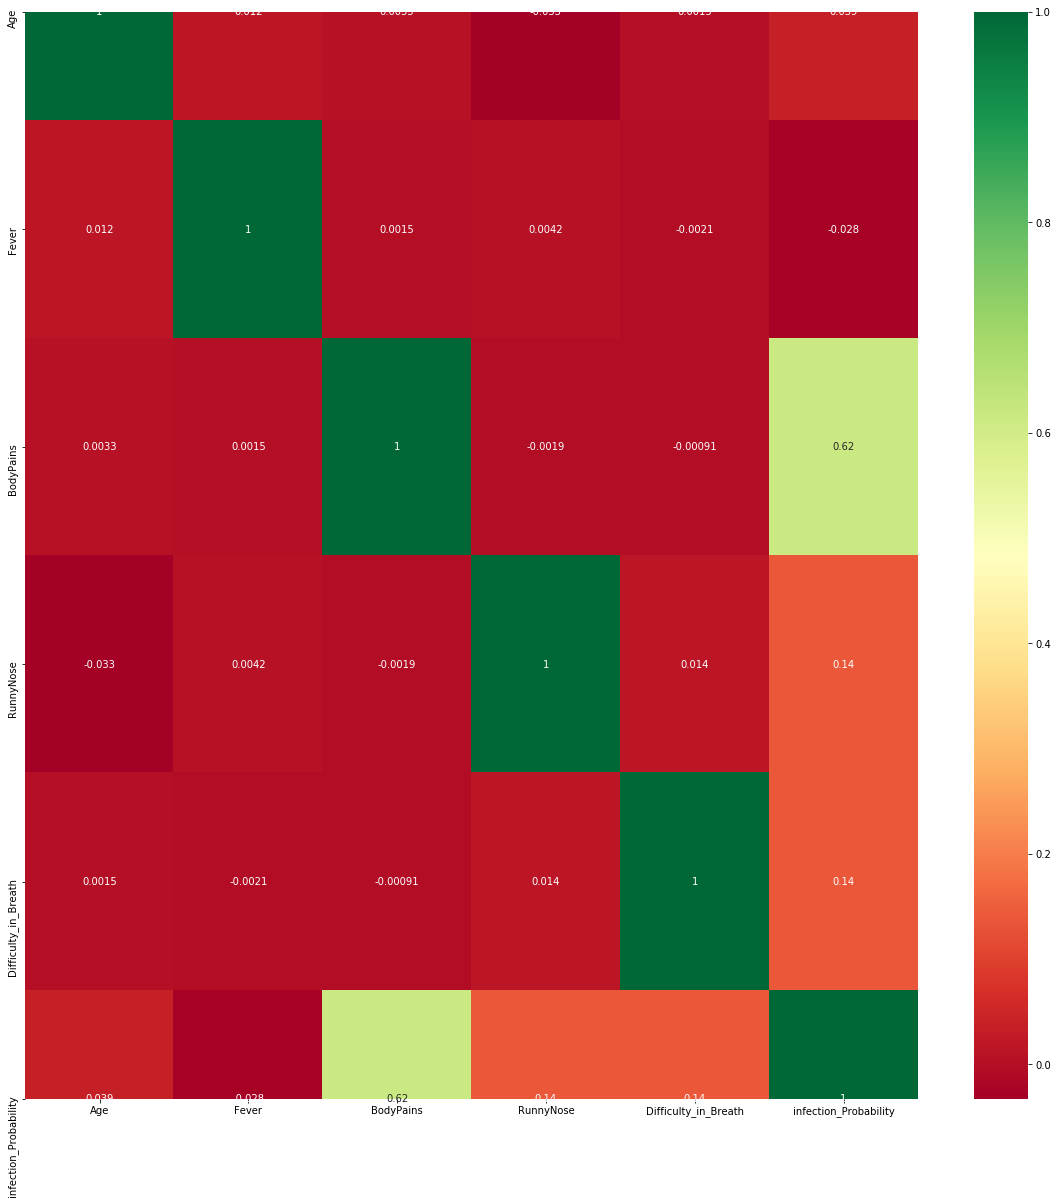

In [154]:
import seaborn as sns

#get correlations of each features in dataset

corrmat = df.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")



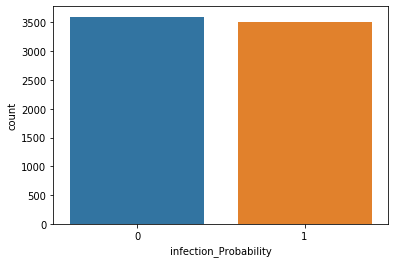

In [107]:
import seaborn as sns
sns.countplot(df.infection_Probability)
plt.show()

In [108]:
# Fever > 100
# Bodypains =1
# runnyNose =1
# breath = 1

# return - 1

In [109]:
cond_1 =(df['Fever']>100) & (df['BodyPains']==1) & (df['RunnyNose']==1) & (df['Difficulty_in_Breath']==1)

In [110]:
df['infection_Probability'][cond_1] = 1

In [111]:
df[cond_1]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
6,44,103,1,1,1,1
7,57,103,1,1,1,1
47,90,105,1,1,1,1
48,4,105,1,1,1,1
67,72,103,1,1,1,1
...,...,...,...,...,...,...
7019,58,104,1,1,1,1
7030,13,107,1,1,1,1
7070,38,102,1,1,1,1
7098,83,103,1,1,1,1


In [112]:
# Age > 60 (and)
# Fever > 99(and)
# runnyNose =1(and)     
 # breath = 1(or)
# Bodypains =1

#return - 1

In [113]:
cond_2 = (df['Age']>=60) & (df['Fever']>99) & (df['RunnyNose']==1) &  (df['Difficulty_in_Breath']==1) | (df['BodyPains']==1)

In [114]:
df['infection_Probability'][cond_2] = 1

In [115]:
df[cond_2]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1
6,44,103,1,1,1,1
7,57,103,1,1,1,1
8,88,99,1,1,1,1
...,...,...,...,...,...,...
7093,61,98,1,0,0,1
7096,76,98,1,1,0,1
7097,57,96,1,0,0,1
7098,83,103,1,1,1,1


In [116]:
df.infection_Probability.value_counts()

1    5423
0    1681
Name: infection_Probability, dtype: int64

In [117]:
# Fever > 99 (and)
# runnyNose =0 (and)     
 # breath = 0 (and)
# Bodypains =0

#return - 0

In [118]:
cond_3 =(df['Fever']>99) & (df['BodyPains']==0) & (df['RunnyNose']==0) & (df['Difficulty_in_Breath']==0)

In [119]:
df['infection_Probability'][cond_3] = 0

df[cond_3]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
16,36,107,0,0,0,0
18,17,104,0,0,0,0
21,70,108,0,0,0,0
27,7,108,0,0,0,0
38,70,101,0,0,0,0
...,...,...,...,...,...,...
7082,97,107,0,0,0,0
7090,42,103,0,0,0,0
7095,59,101,0,0,0,0
7100,22,104,0,0,0,0


In [120]:
df.infection_Probability.value_counts()

1    5133
0    1971
Name: infection_Probability, dtype: int64

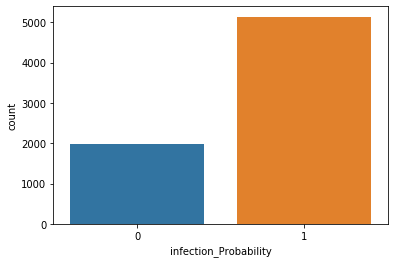

In [121]:
sns.countplot(df.infection_Probability)
plt.show()

In [122]:
df.shape

(7104, 6)

In [123]:
df.head(2)

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1


In [124]:
X = df.drop('infection_Probability',axis=1).values
Y = df['infection_Probability'].values

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.20, random_state=1)

In [126]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight='balanced')

In [127]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [138]:
model.predict(X_test)

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [139]:
model.score(X_train, Y_train)

0.8048565898293155

In [140]:
te_pred = model.predict(X_test)
te_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [141]:
model.fit(X_test, Y_test)
model.score(X_test, Y_test)

0.9866291344123856

In [156]:
pred = [[80,100,0,0,0]]
if model.predict(pred)==0:
    print("The person is likely NOT suffering from COVID-19")
else:
    print("The person is likely suffering from COVID-19")

The person is likely NOT suffering from COVID-19


In [158]:
import statistics 
  
# creating a simple data - set 
sample = [5, 10, 15, 20, 25] 

print("Standard Deviation of sample is % s " 
                % (statistics.stdev(sample))) 

Standard Deviation of sample is 7.905694150420948 


In [160]:
from statistics import stdev 
from fractions import Fraction as fr 
  
sample1 = (1, 2, 5, 4, 8, 9, 12) 
  
sample2 = (-2, -4, -3, -1, -5, -6) 
  
sample3 = (-9, -1, -0, 2, 1, 3, 4, 19) 
  
sample4 = (1.23, 1.45, 2.1, 2.2, 1.9) 
   
print("The Standard Deviation of Sample1 is % s" 
                              %(stdev(sample1))) 
                                
print("The Standard Deviation of Sample2 is % s" 
                              %(stdev(sample2))) 
                                
print("The Standard Deviation of Sample3 is % s" 
                              %(stdev(sample3))) 
                                
                                
print("The Standard Deviation of Sample4 is % s" 
                              %(stdev(sample4)))

The Standard Deviation of Sample1 is 3.9761191895520196
The Standard Deviation of Sample2 is 1.8708286933869707
The Standard Deviation of Sample3 is 7.8182478855559445
The Standard Deviation of Sample4 is 0.41967844833872525


In [161]:
import statistics 
  
# creating a sample list 
sample = (1, 1.3, 1.2, 1.9, 2.5, 2.2) 
  
# calculating the mean of sample set 
m = statistics.mean(sample) 
  
# xbar is nothing but stores  
# the mean of the sample set 
  
# calculating the variance of sample set 
print("Standard Deviation of Sample set is % s" 
         %(statistics.stdev(sample, xbar = m))) 

Standard Deviation of Sample set is 0.6047037842337906


In [162]:
import statistics 
  
# creating a data-set with one element 
sample = [1] 
  
# will raise StatisticsError 
print(statistics.stdev(sample))

StatisticsError: variance requires at least two data points